In [1]:
import pandas as pd
import numpy as np
import os

In [33]:
path=r'C:\Users\DELL\Downloads\archive (1)'
cpath=os.path.join(path,'Cat')
i=0
for img in os.listdir(path):
    img_path=os.path.join(path,img)
    print(img_path)
    i+=1
    if i>100:
        break




C:\Users\DELL\Downloads\archive (1)\0.jpg
C:\Users\DELL\Downloads\archive (1)\1.jpg
C:\Users\DELL\Downloads\archive (1)\10.jpg
C:\Users\DELL\Downloads\archive (1)\100.jpg
C:\Users\DELL\Downloads\archive (1)\101.jpg
C:\Users\DELL\Downloads\archive (1)\102.jpg
C:\Users\DELL\Downloads\archive (1)\103.jpg
C:\Users\DELL\Downloads\archive (1)\10302.jpg
C:\Users\DELL\Downloads\archive (1)\10303.jpg
C:\Users\DELL\Downloads\archive (1)\10304.jpg
C:\Users\DELL\Downloads\archive (1)\10305.jpg
C:\Users\DELL\Downloads\archive (1)\10306.jpg
C:\Users\DELL\Downloads\archive (1)\10307.jpg
C:\Users\DELL\Downloads\archive (1)\10308.jpg
C:\Users\DELL\Downloads\archive (1)\10309.jpg
C:\Users\DELL\Downloads\archive (1)\10310.jpg
C:\Users\DELL\Downloads\archive (1)\10311.jpg
C:\Users\DELL\Downloads\archive (1)\10312.jpg
C:\Users\DELL\Downloads\archive (1)\10313.jpg
C:\Users\DELL\Downloads\archive (1)\10314.jpg
C:\Users\DELL\Downloads\archive (1)\10315.jpg
C:\Users\DELL\Downloads\archive (1)\10316.jpg
C:\User

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

datagen=ImageDataGenerator(rotation_range=40,width_shift_range=.2,height_shift_range=.2,rescale=1.0/255,shear_range=.2,zoom_range=.2,horizontal_flip=True,fill_mode='nearest')


In [3]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [14]:
m=Sequential()
m.add(Conv2D(32,(3,3),input_shape=(150,150,3)))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Conv2D(32,(3,3)))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Conv2D(64,(3,3)))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Flatten())
m.add(Dense(64))
m.add(Activation('relu'))
m.add(Dropout(.5))
m.add(Dense(1))
m.add(Activation('sigmoid'))
m.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [15]:
batch_size=16
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2,zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_gen=train_datagen.flow_from_directory(r'C:\Users\DELL\Downloads\train',target_size=(150,150),batch_size=16,class_mode='binary')
test_gen=test_datagen.flow_from_directory(r'C:\Users\DELL\Downloads\test',target_size=(150,150),batch_size=16,class_mode='binary')
m.fit_generator(train_gen,steps_per_epoch=99//batch_size,epochs=2,validation_data=test_gen,validation_steps=33//batch_size)

Found 198 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


C:\Users\DELL\AppData\Local\Temp\ipykernel_3008\2795195746.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m.fit_generator(train_gen,steps_per_epoch=99//batch_size,epochs=2,validation_data=test_gen,validation_steps=33//batch_size)


Epoch 1/2
6/6 [==============================] - 4s 564ms/step - loss: 0.8914 - accuracy: 0.5521 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/2
6/6 [==============================] - 2s 417ms/step - loss: 0.6972 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.5625


In [17]:
m.save_weights('firsttryphoto.h5')

In [35]:
img=load_img(r'C:\Users\DELL\Downloads\dog.jpg')
x=img_to_array(img.resize([150,150]))
x=x.reshape((1,)+x.shape)
if (m.predict(x)==1):
    print('It is a Cat ')
else:
    print('It is a dog')
    


1/1 [==============================] - 0s 34ms/step
It is a Cat 


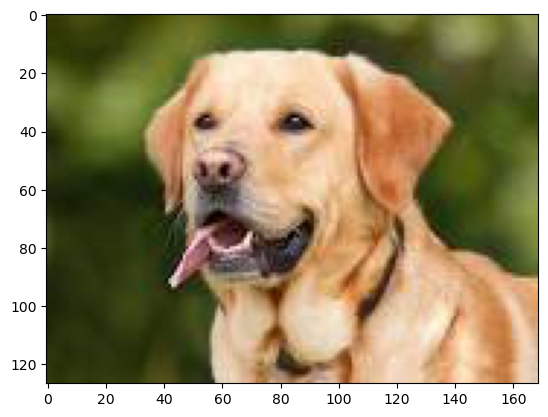

In [36]:
import matplotlib.pyplot as plt
plt.imshow(img)